In [10]:
import pandas as pd
import numpy as np
from data_clean import data_clean
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.pipeline import Pipeline, make_pipeline
import seaborn as sns
import matplotlib.pyplot as plt

X_train_temp = pd.read_csv('./data/dirty_X_train.csv',index_col = 0)
y_train_temp = pd.read_csv('./data/dirty_y_train.csv',index_col = 0)

X_train = data_clean(X_train_temp,'x')
y_train = data_clean(y_train_temp,'y')
# X_train.describe()

In [11]:
X_train.head()

,LBW,Premature,Under_18,Over_40,Late_Care,MVA,Suicide,No_HS_Diploma,Unemployed,Sev_Work_Disabled,...,Recent_Drug_Use,No_Exercise,Few_Fruit_Veg,High_Blood_Pres,Diabetes,Uninsured,Elderly_Medicare,Disabled_Medicare,Prim_Care_Phys_Rate,Dentist_Rate
1019,7.2,12.3,6.3,1.3,12.4,47.9,21.400000,30.87,3.40,5.55,...,5.40,26.446281,78.887212,26.381457,3.2,19.45,1197.0,328.0,42.0,56.0
2030,7.8,15.5,8.8,1.1,37.5,88.2,46.700000,11.24,2.30,2.61,...,3.59,21.900000,78.887212,12.900000,15.0,26.57,225.0,67.0,23.9,23.9
700,6.3,11.7,2.0,2.5,12.0,16.7,14.900000,7.56,2.04,2.61,...,4.31,23.700000,74.400000,29.900000,6.1,5.54,5189.0,583.0,159.4,38.4
1683,7.3,12.3,2.6,1.7,12.7,46.2,13.484243,7.73,1.65,1.82,...,4.08,20.100000,78.887212,26.381457,6.7,17.35,479.0,40.0,0.0,0.0
1652,6.1,10.8,3.2,1.7,12.4,10.4,7.300000,8.89,1.68,1.66,...,4.02,22.700000,81.000000,27.400000,5.5,8.94,4585.0,609.0,84.7,66.5


In [12]:
# sns.heatmap(X_train.isin([-9999,-2222,-2222.2,-2,-1111.1,-1111,-1]))

In [17]:
pipe = Pipeline([
    ('sc', StandardScaler() ),
    ('elastic', ElasticNet(max_iter=10000) )
])

params = {
    'elastic__alpha': [.001, .025,.4,.6 , .05,.1, .5,.75, 1, 2, 5, 10],
    'elastic__l1_ratio' : [.1, .5, .7,.6, .9, .95, .99, 1]
}

search= GridSearchCV(estimator=pipe,
                    param_grid=params,
                    cv=5,
                    return_train_score=True
                    )
search.fit(X_train, y_train)


/home/will/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('sc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('elastic',
                                        ElasticNet(alpha=1.0, copy_X=True,
                                                   fit_intercept=True,
                                                   l1_ratio=0.5, max_iter=10000,
                                                   normalize=False,
                                                   positive=False,
                                                   precompute=False,
                                                   random_state=None,
                                                   selection='cyclic',
                         

In [18]:
search.best_index_, search.best_params_, search.best_score_

(19, {'elastic__alpha': 0.4, 'elastic__l1_ratio': 0.6}, 0.5865159918203663)

In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2512 entries, 773 to 1753
Data columns (total 22 columns):
Population_Size        2512 non-null float64
LBW                    2512 non-null float64
Premature              2512 non-null float64
Under_18               2512 non-null float64
Over_40                2512 non-null float64
Late_Care              2512 non-null float64
MVA                    2512 non-null float64
Suicide                2512 non-null float64
No_HS_Diploma          2512 non-null float64
Unemployed             2512 non-null float64
Sev_Work_Disabled      2512 non-null float64
Major_Depression       2512 non-null float64
Recent_Drug_Use        2512 non-null float64
No_Exercise            2512 non-null float64
Few_Fruit_Veg          2512 non-null float64
High_Blood_Pres        2512 non-null float64
Diabetes               2512 non-null float64
Uninsured              2512 non-null float64
Elderly_Medicare       2512 non-null float64
Disabled_Medicare      2512 non-null

In [28]:
CV=pd.DataFrame(search.cv_results_)
CV2=CV.sort_values('rank_test_score')
CV2.head(25)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_elastic__alpha,param_elastic__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
19,0.004343,0.000103,0.002054,0.000245,0.4,0.6,"{'elastic__alpha': 0.4, 'elastic__l1_ratio': 0.6}",0.617680,0.612961,0.559274,...,0.586516,0.033195,1,0.586150,0.577631,0.595914,0.604687,0.585582,0.589993,0.009360
49,0.004559,0.000567,0.001886,0.000095,0.5,0.5,"{'elastic__alpha': 0.5, 'elastic__l1_ratio': 0.5}",0.609098,0.604169,0.552760,...,0.578798,0.032368,2,0.578244,0.569350,0.587931,0.596640,0.577437,0.581920,0.009428
18,0.004358,0.000092,0.001811,0.000049,0.4,0.7,"{'elastic__alpha': 0.4, 'elastic__l1_ratio': 0.7}",0.609577,0.599437,0.548060,...,0.575782,0.032940,3,0.575196,0.566640,0.585561,0.594119,0.574218,0.579147,0.009609
51,0.004428,0.000220,0.001836,0.000169,0.5,0.6,"{'elastic__alpha': 0.5, 'elastic__l1_ratio': 0.6}",0.597700,0.586639,0.538175,...,0.564564,0.031954,4,0.563727,0.554666,0.574205,0.582502,0.562384,0.567497,0.009748
25,0.004302,0.000048,0.001836,0.000076,0.6,0.5,"{'elastic__alpha': 0.6, 'elastic__l1_ratio': 0.5}",0.590571,0.580235,0.534012,...,0.558851,0.031146,5,0.557987,0.548395,0.568308,0.576354,0.556665,0.561542,0.009741
20,0.004371,0.000072,0.001856,0.000076,0.4,0.9,"{'elastic__alpha': 0.4, 'elastic__l1_ratio': 0.9}",0.590117,0.570726,0.520836,...,0.550507,0.033025,6,0.550220,0.542472,0.560640,0.568715,0.548832,0.554176,0.009320
50,0.004474,0.000670,0.001821,0.000050,0.5,0.7,"{'elastic__alpha': 0.5, 'elastic__l1_ratio': 0.7}",0.584754,0.567518,0.520741,...,0.548288,0.031742,7,0.547998,0.538331,0.557988,0.566549,0.546282,0.551430,0.009813
21,0.004451,0.000052,0.001934,0.000212,0.4,0.95,"{'elastic__alpha': 0.4, 'elastic__l1_ratio': 0...",0.584220,0.563448,0.513886,...,0.543877,0.033027,8,0.542763,0.536138,0.554226,0.561562,0.542611,0.547460,0.009148
27,0.004402,0.000123,0.001828,0.000083,0.6,0.6,"{'elastic__alpha': 0.6, 'elastic__l1_ratio': 0.6}",0.574073,0.557266,0.513315,...,0.539102,0.030658,9,0.538507,0.528507,0.548702,0.556930,0.536609,0.541851,0.009910
22,0.004754,0.000549,0.002054,0.000478,0.4,0.99,"{'elastic__alpha': 0.4, 'elastic__l1_ratio': 0...",0.579213,0.557248,0.508133,...,0.538578,0.032627,10,0.536532,0.530764,0.548958,0.557036,0.537454,0.542149,0.009500


In [29]:
rid=ElasticNet(alpha=.4, l1_ratio=.6, max_iter=50000)
rid.fit(X_train, y_train)
coeffs=rid.coef_.tolist()
c_ind=list(range(26))
# coeffs=coeffs[0]
coeffs_columns=X_train.columns
coefficients=list(zip(coeffs,coeffs_columns))
coefficients.sort()
coefficients

[(-0.14981513724606846, 'LBW'),
 (-0.10300113191803541, 'Under_18'),
 (-0.09728428959557688, 'Premature'),
 (-0.0815862696154753, 'No_HS_Diploma'),
 (-0.04400707416057921, 'Diabetes'),
 (-0.04320012174361296, 'No_Exercise'),
 (-0.025302685803989686, 'MVA'),
 (-0.021018610374785786, 'High_Blood_Pres'),
 (-0.005541601332343484, 'Suicide'),
 (-0.005196235956489204, 'Few_Fruit_Veg'),
 (-0.0010970087741161367, 'Prim_Care_Phys_Rate'),
 (-0.0010488687596863573, 'Sev_Work_Disabled'),
 (-0.00032098968580640574, 'Disabled_Medicare'),
 (0.0, 'Late_Care'),
 (-0.0, 'Major_Depression'),
 (0.0, 'Over_40'),
 (-0.0, 'Recent_Drug_Use'),
 (-0.0, 'Unemployed'),
 (4.8223747495530645e-05, 'Elderly_Medicare'),
 (0.0005931592583380508, 'Dentist_Rate'),
 (0.000699776648030397, 'Uninsured')]

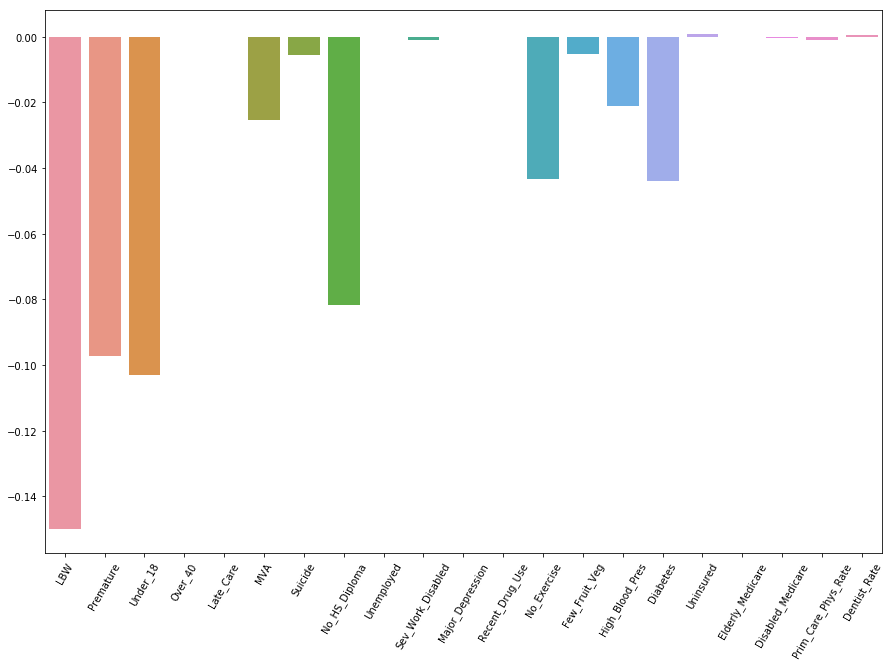

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,10))
plt.xticks(rotation=60)
sns.barplot(coeffs_columns,coeffs)
